In [50]:
# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Load Dataset
df = pd.read_excel('nilaiML.xlsx')
df.head()

,No,Nama Mahasiswa,Kuis,Tugas,UTS,UAS,Nilai Akhir,Kelulusan
0,1,Lionel Messi,85,90,88,92,89.5,Lulus
1,2,Cristiano Ronaldo,80,85,82,87,84.1,Lulus
2,3,Kylian Mbappé,78,82,79,85,81.1,Lulus
3,4,Erling Haaland,75,70,74,80,75.2,Lulus
4,5,Neymar Jr,60,65,70,60,63.5,Tidak Lulus


In [52]:
# Encode Kolom kelulusan
df['Kelulusan'] = df['Kelulusan'].map({'Lulus': 1, 'Tidak Lulus': 0})

# Pisahkan fitur dan target
X = df[['Kuis', 'Tugas', 'UTS', 'UAS']]
y = df['Kelulusan']

# Split Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

# Menampilkan Hasil Akurasi
print("Akurasi Random Forest: {:.2f}%".format(rf_acc * 100))
print("Akurasi XGBoost      : {:.2f}%".format(xgb_acc * 100))

# Hasil Klasifikasi
print("\nHasil Random Forest:")
print(classification_report(y_test, rf_preds, target_names=['Tidak Lulus', 'Lulus']))

print("\nHasil XGBoost:")
print(classification_report(y_test, xgb_preds, target_names=['Tidak Lulus', 'Lulus']))

Akurasi Random Forest: 100.00%
Akurasi XGBoost      : 100.00%

Hasil Random Forest:
              precision    recall  f1-score   support

 Tidak Lulus       1.00      1.00      1.00         2
       Lulus       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Hasil XGBoost:
              precision    recall  f1-score   support

 Tidak Lulus       1.00      1.00      1.00         2
       Lulus       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:16:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [54]:
# Pemilihan model terbaik dan interpretasi
if rf_acc >= xgb_acc:
    best_model = rf_model
    model_name = "Random Forest"
else:
    best_model = xgb_model
    model_name = "XGBoost"

print(f"\nModel terbaik: {model_name} (akurasi: {max(rf_acc, xgb_acc)*100:.2f}%)")


Model terbaik: Random Forest (akurasi: 100.00%)


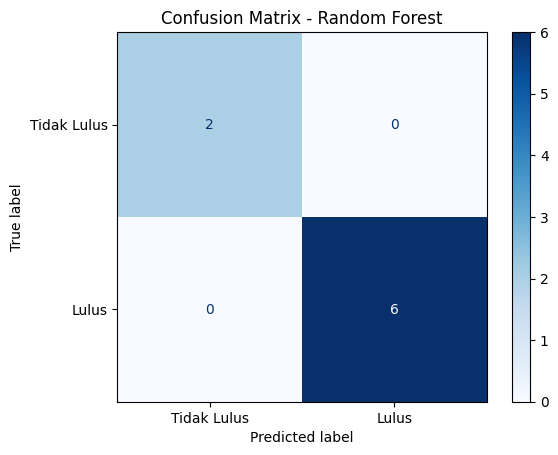

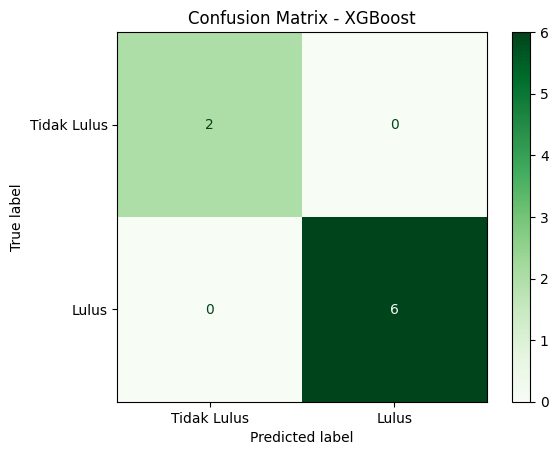

In [55]:
#Evaluasi dengan confusion matrix

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, rf_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Tidak Lulus', 'Lulus'])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Confusion Matrix XGBoost
cm_xgb = confusion_matrix(y_test, xgb_preds)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Tidak Lulus', 'Lulus'])
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.show()

<ipython-input-56-1c319cf2300f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fitur', data=importance_df, palette='viridis')


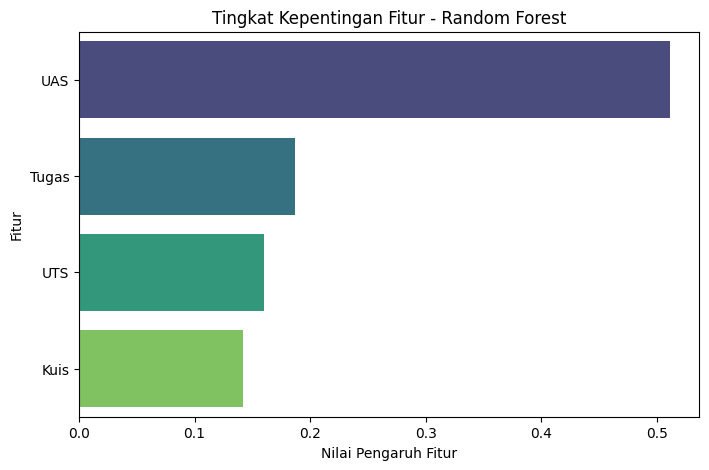

In [56]:
# Feature Importance
importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Fitur': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Fitur', data=importance_df, palette='viridis')
plt.title(f'Tingkat Kepentingan Fitur - {model_name}')
plt.xlabel('Nilai Pengaruh Fitur')
plt.ylabel('Fitur')
plt.show()